Osnabrück University - Machine Learning (Summer Term 2020) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 05b: Dimension Reduction

## Introduction

This week's sheet should be solved and handed in before the end of **Saturday, June 06, 2020**. If you need help (and Google and other resources were not enough), feel free to contact your groups designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 1: Covariance and autocorrelation matrix [5 Points]

**a)** Recap: What is the covariance matrix? What do the different entries of the matrix mean? 

The covariance $\sigma (x,y)$ of two random variables x and y is:

$\sigma (x,y) = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}).$

The single elements of the matrix are the covariances between two different variables (or two datasets). On the main diagonal, you can therefore find the variances of each single variable. The covariance matrix is symmetric.

(eg: the main diagonal is 1, where both (variance of) x and y are positively correlated with each other)

**b)** What can the covariance matrix be used for? Name at least two applications.

The covariance matrix tells us how one set of variable is related to another ( or two sets of data) and understand the dependency. PCA is one of the applications used for noise reduction and dimension reduction.

**c)** Execute the next cell. You can see three data sets. Which of the three covariance matrices below belongs to which plot?

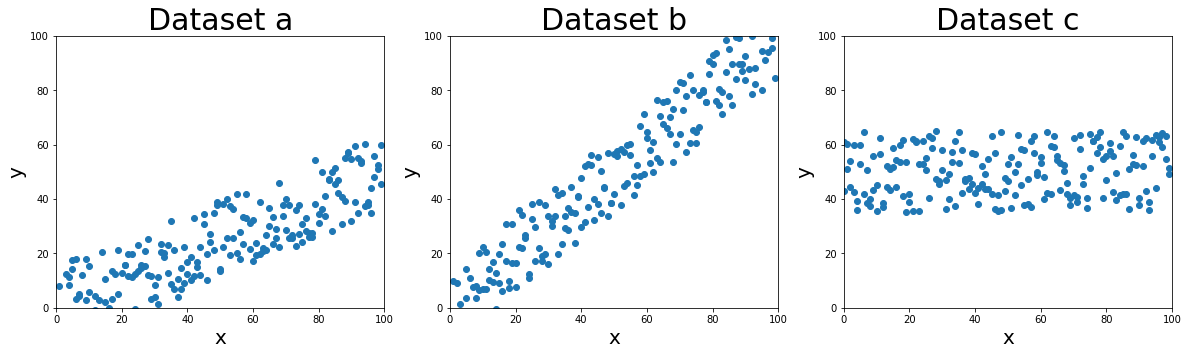

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (20,5))
factors = [0.5,1,0]
names = ["a", "b", "c"]
datasets = []
for i, factor in enumerate(factors):
    x = np.array(np.arange(100).tolist() + np.arange(100).tolist())
    if factor!=0:
        y = x * factor + (np.random.rand(len(x))-0.5)*30
    else:
        y = np.array([50 for _ in range(len(x))]) + (np.random.rand(len(x))-0.5)*30
    plt.subplot(1,len(factors),i+1)
    plt.scatter(x,y)
    plt.title("Dataset "+names[i], fontsize = 30)
    plt.xlabel("x", fontsize = 20)
    plt.ylabel("y", fontsize = 20)
    plt.ylim(0, 100)
    plt.xlim(0, 100)
    datasets.append(np.stack([x, y], axis = 1))
plt.show()

**Covariance matrix I:**

| C1    |  x  |  y  |
|-------|-----|-----|
| **x** | 837 | 877 |
| **y** | 877 | 989 |

**Covariance matrix II:**

 | C2 | x | y |
 | ---|---|---|
 |   **x** |  837 | 1  |
 |   **y**| 1  |  66 |


**Covariance matrix III:**

| C3 | x | y |
| ---|---|---|
|   **x** |  837 | 453  |
|   **y**| 453  |  318 |


Matrix1 belongs to dataset b where the variance for x is positively correlated with y, 

Matrix2 belongs to dataset c where the spread for y is minimal as x increases and,

Matrix3 belongs to dataset a. 

**d)** Implement the formula for the autocorrelation matrix

$$ A = \frac{1}{|D|} \sum_{\overrightarrow{x} \in D} (\frac{(\overrightarrow{x} - \overrightarrow{\mu})}{\overrightarrow{s}})^T \frac{(\overrightarrow{x}- \overrightarrow{\mu})}{\overrightarrow{s}} $$

Hint: For your implementation, it might be more efficient to divide by the matrix of standard deviations in the end. The matrix of standard deviations for two dimensions looks like this:

| S | x | y |
| ---|---|---|
|   **x** |  $$s_{x}s_{x}$$| $$s_{x}s_{y}$$ |
|   **y**| $$s_{y}s_{x}$$ |  $$s_{y}s_{y}$$ |


Make sure to make your implementation work for more than two dimensional data as well!

Then execute the cell below which shows the autocorrelation matrices for the datasets of task c.

In [21]:
def autocorrelation(data):
    """
    Input is an array of the form number_data * dimensions
    An example is shown when this cell is executed
    """
    # YOUR CODE HERE
    # calculate counter of correlation
    mean_vec = np.ones(data.shape)
    for col in range(len(mean_vec[0])):
        mean_vec[:,col].fill(np.mean(data[:,col]))
    
    prod = (data-mean_vec).T@(data-mean_vec)
    
    # calculate denominator of correlation
    sum_store = []
    new_dat = data-mean_vec
    for col in new_dat.T:
        col_sum = 0
        for value in col:
            col_sum += value*value
        sum_store.append(col_sum)
    
    std_mat = []
    first = np.tile(sum_store,data.shape[1])
    sec = np.repeat(sum_store, data.shape[1])
    s = np.sqrt(first*sec).reshape((data.shape[1], data.shape[1]))
    
    # calculate correlation matrix; if s == 0, don't divide
    corr = np.divide(prod, s, out=np.zeros_like(prod), where=s!=0)
    return corr
    
## DELETE COMMENTS TO SHOW THE DATA USED FOR ASSERTION 
# example_x = [2,2,2]
# example_y = [1,2,3]
# example_data = np.stack([[1,2,3], [2,2,2]], axis=1)
# plt.scatter(example_x, example_y)
# plt.show()

test_data1 = np.stack([[1,2,3], [2,2,2]], axis=1)
cor1 = autocorrelation(test_data1)
real_cor1 = [[1.0, 0.0], [0.0, 0.0]]

test_data2 = np.stack([[1,2,3], [4,5,6]], axis=1)
cor2 = autocorrelation(test_data2)
real_cor2 = [[1,1], [1,1]]

assert np.allclose(cor1, real_cor1), "Wrong output: correlation should be \n {} \n for this data, is \n {}".format(real_cor1, cor1)
assert np.allclose(cor2, real_cor2), "Wrong output: correlation should be \n {} \n for this data, is \n {}".format(real_cor2, cor2)

In [22]:
# the data of task c is saved in a list called datasets
for i, d in enumerate(datasets):
    print("Autocorrelation matrix for data set", names[i], "\n", autocorrelation(d), "\n")

Autocorrelation matrix for data set a 
 [[1.         0.85491762]
 [0.85491762 1.        ]] 

Autocorrelation matrix for data set b 
 [[1.         0.96087189]
 [0.96087189 1.        ]] 

Autocorrelation matrix for data set c 
 [[1.         0.13080538]
 [0.13080538 1.        ]] 



**e)** What is the difference between the autocorrelation matrix and covariance matrix? When should it be used?

Dimension of a covariance matrix is $p × p$. This is basically a symmetric matrix. The elements of a covariance matrix are called the variances of a given variable, forming the diagonal of the matrix or the covariance of two variables filling up the rest of the space. The covariance of $x$ with $y$ is equivalent to $‘txy’= ‘tyx’ $ (T' = transpose). Whereas, the correlation matrix can be defined as the product of the transpose of the scaled matrix with itself, divided by $'s'$. It is dimensionless, a unit-free measure of the relationship between variables $x$ and $y$. The 
correlation matrix elements lie between $-1$ and $+1$, covariance matrix elements can take any value between $-∞$ and $+∞$.

It can be used for PCA. Covariance matrix can be used when the variable are on similar scale and correlation matrix is used when variables are on different scales.


## Assignment 2: Local PCA (5 Points)

In the lecture we learned that regular PCA is ill suited for special cases of data. In this assignment we will take a look at local PCA which is used for clustered data (ML-06, Slide 25). This is mostly a repetition of algorithms we already used. Feel free to use the built-in functions for k-means clustering and PCA from the libraries (we already included the right imports to set you on track).

<IPython.core.display.Javascript object>


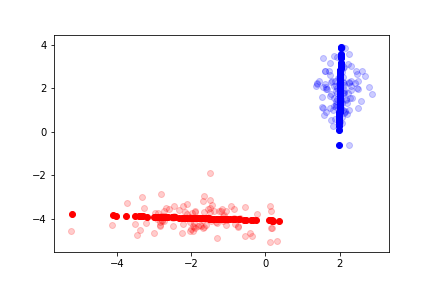

In [23]:
%matplotlib notebook

import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

from numpy.random import multivariate_normal as multNorm

from scipy.cluster.vq import kmeans, vq
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

np.random.seed(42)

DEBUG = False

# Generate clustered data - you may plot the data to take a look at it
data = np.vstack((multNorm([2, 2], [[0.1, 0], [0, 1]], 100),
                  multNorm([-2, -4], [[1, 0], [0, 0.3]], 100)))

# TODO: Apply k-means to the data.
# YOUR CODE HERE
#start
# use k-means on the dataset
k = KMeans(n_clusters=2, random_state=0).fit(data)
if DEBUG:
    print(type(data), len(data))
    print(k.labels_, type(k.labels_), len(k.labels_))

# Create two separate datasets to perform PCA on each of them
clusters = [[],[]]
for dat, label in zip(data, k.labels_):
    clusters[label].append(list(dat))
if DEBUG:
    print(type(clusters[0]))
    #print(clusters[0])
clusters[0] = np.array(clusters[0])    
clusters[1] = np.array(clusters[1]) 

# TODO: Apply PCA for each cluster and store each two largest components.
# YOUR CODE HERE

# Apply PCA on each of the clusters. 
# PCA is applied and the dimension reduced.

#additional code start
pca = PCA(n_components = 2)
pca.fit(clusters[0])
pca_comp0 = pca.components_
pca.fit(clusters[1])
pca_comp1 = pca.components_
#additional code end

pca = PCA(n_components=1)
pca.fit(clusters[1])
reduced_dimension = pca.transform(clusters[1])
reduced_dim_c1 = pca.inverse_transform(reduced_dimension)

pca = PCA(n_components=1)
pca.fit(clusters[0])
reduced_dimension = pca.transform(clusters[0])
reduced_dim_c0 = pca.inverse_transform(reduced_dimension)

# TODO: Plot the results of k-means and local PCA
# YOUR CODE HERE


# You can see here the opaque data points representing the reduced data
plt.scatter(clusters[0][:, 0], clusters[0][:, 1], alpha=0.2, c='r')
plt.scatter(clusters[1][:, 0], clusters[1][:, 1], alpha=0.2, c='b')
plt.scatter(reduced_dim_c0[:, 0], reduced_dim_c0[:, 1], c='r')
plt.scatter(reduced_dim_c1[:, 0], reduced_dim_c1[:, 1], c='b')

plt.show()
#end

In [24]:
###### Just some tests...
print(data[1], k.labels_[1])
print(data[2])
print(data[3])
print()
print(data[197], type(data[197]))
print(data[198])
print(data[199])

print(len(clusters[0]), len(clusters[1]))

print("original shape:   ", clusters[0].shape)
print("transformed shape:", reduced_dim_c0.shape)

[2.48162433 2.64768854] 1
[1.92595939 1.76584663]
[2.24268417 3.57921282]

[-0.82055988 -4.25697809] <class 'numpy.ndarray'>
[-3.71313453 -3.25845356]
[-2.11453985 -3.32202008]
100 100
original shape:    (100, 2)
transformed shape: (100, 2)


## Assignment 3: Data Visualization and Chernoff Faces (3 Points)

The following exercise contains no programming (unless you want to go through the implementation). Answer the questions that are posted below the code segment (and run the code before - it's really worth it!). In case you are even more interested - here is a link to the [original paper](http://www.dtic.mil/cgi-bin/GetTRDoc?AD=AD0738473).

<IPython.core.display.Javascript object>


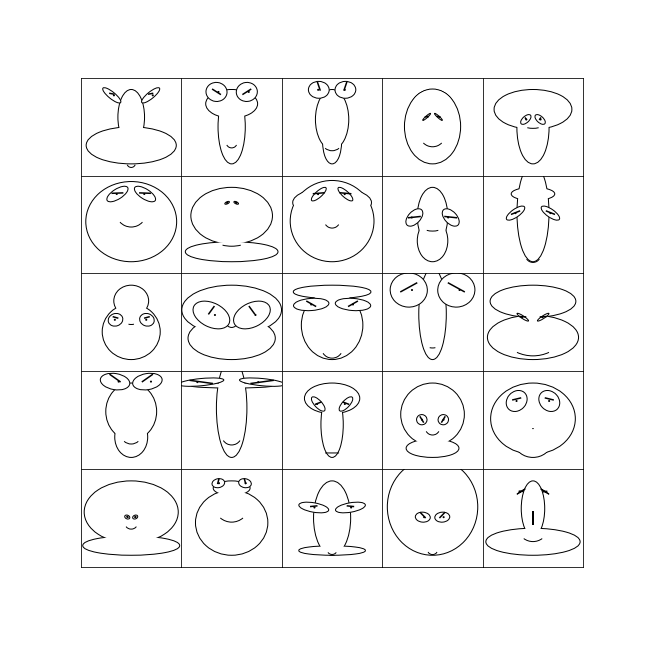

In [25]:
%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Arc
from numpy.random import rand
import numpy as np

def cface(ax, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18):
    """
    This implementation of chernov faces is taken from Abraham Flaxman. You can
    find the original source files here: https://gist.github.com/aflaxman/4043086
    Only minor adjustments have been made.

     x1 = height  of upper face
     x2 = overlap of lower face
     x3 = half of vertical size of face
     x4 = width of upper face
     x5 = width of lower face
     x6 = length of nose
     x7 = vertical position of mouth
     x8 = curvature of mouth
     x9 = width of mouth
     x10 = vertical position of eyes
     x11 = separation of eyes
     x12 = slant of eyes
     x13 = eccentricity of eyes
     x14 = size of eyes
     x15 = position of pupils
     x16 = vertical position of eyebrows
     x17 = slant of eyebrows
     x18 = size of eyebrows
    """

    # transform some values so that input between 0,1 yields variety of output
    x3 = 1.9 * (x3 - .5)
    x4 = (x4 + .25)
    x5 = (x5 + .2)
    x6 = .3 * (x6 + .01)
    x8 = 5 * (x8 + .001)
    x11 /= 5
    x12 = 2 * (x12 - .5)
    x13 += .05
    x14 += .1
    x15 = .5 * (x15 - .5)
    x16 = .25 * x16
    x17 = .5 * (x17 - .5)
    x18 = .5 * (x18 + .1)

    # top of face, in box with l=-x4, r=x4, t=x1, b=x3
    e = Ellipse((0, (x1 + x3) / 2), 2 * x4, (x1 - x3), ec='black', linewidth=2)
    ax.add_artist(e)

    # bottom of face, in box with l=-x5, r=x5, b=-x1, t=x2+x3
    e = Ellipse((0, (-x1 + x2 + x3) / 2), 2 * x5, (x1 + x2 + x3), fc='white', ec='black', linewidth=2)
    ax.add_artist(e)

    # cover overlaps
    e = Ellipse((0, (x1 + x3) / 2), 2 * x4, (x1 - x3), fc='white', ec='none')
    ax.add_artist(e)
    e = Ellipse((0, (-x1 + x2 + x3) / 2), 2 * x5, (x1 + x2 + x3), fc='white', ec='none')
    ax.add_artist(e)

    # draw nose
    plt.plot([0, 0], [-x6 / 2, x6 / 2], 'k')

    # draw mouth
    p = Arc((0, -x7 + .5 / x8), 1 / x8, 1 / x8, theta1=270 - 180 / np.pi * np.arctan(x8 * x9),
            theta2=270 + 180 / np.pi * np.arctan(x8 * x9))
    ax.add_artist(p)

    # draw eyes
    p = Ellipse((-x11 - x14 / 2, x10), x14, x13 * x14, angle=-180 / np.pi * x12, fc='white', ec='black')
    ax.add_artist(p)

    p = Ellipse((x11 + x14 / 2, x10), x14, x13 * x14, angle=180 / np.pi * x12, fc='white', ec='black')
    ax.add_artist(p)

    # draw pupils
    p = Ellipse((-x11 - x14 / 2 - x15 * x14 / 2, x10), .05, .05, facecolor='black')
    ax.add_artist(p)
    p = Ellipse((x11 + x14 / 2 - x15 * x14 / 2, x10), .05, .05, facecolor='black')
    ax.add_artist(p)

    # draw eyebrows
    ax.plot([-x11 - x14 / 2 - x14 * x18 / 2, -x11 - x14 / 2 + x14 * x18 / 2],
            [x10 + x13 * x14 * (x16 + x17), x10 + x13 * x14 * (x16 - x17)], 'k')
    ax.plot([x11 + x14 / 2 + x14 * x18 / 2, x11 + x14 / 2 - x14 * x18 / 2],
            [x10 + x13 * x14 * (x16 + x17), x10 + x13 * x14 * (x16 - x17)], 'k')


fig, axes = plt.subplots(nrows=5, ncols=5, num='Chernoff Faces', figsize=(9, 9))
for ax in axes.flat:
    cface(ax, .9, *rand(17))
    ax.axis([-1.2, 1.2, -1.2, 1.2])
    ax.set(xticks=[], yticks=[])

fig.subplots_adjust(hspace=0, wspace=0)


### a) Data Visualization Techniques

Why do we need data visualization techniques and what are techniques to visualize high dimensional data?

Visualization of data makes it easier for humans to understand patterns and see similarities and differences between data vectors. Numbers are not easy to process for humans and the more numerical data is shown, the more difficult it becomes. 

For example:  if three data vectors (162.3, 61.1), (134.3, 89.2) and (141.3, 90.5) are given, one might see that 2 and 3 possibly belong to one class (d1 is rather large, d2 is small for the first data vector, for the others it's the other way around), but the higher the dimension and the more data vectors, the harder it becomes detect patterns by mere numbers. If the data is somehow visualized, patterns can be made visible and humans are very good at pattern recognition.

Sometimes the data analysis cant be done completely automated in which case visualization is very useful.

Even if we fully automate the analysis, the understanding of the data needs visualization as compressing a high dimensional data to small or fewer dimensions can make it lose information  (for high dimensionality (<10) or few (2-3) dimensions, it becomes easier to represent data as humans have a highly formed pattern recognition abilities.)

To visualize high dimension data we can use glyphs. Glyphs will transform a dimension (or multiple) to a parameter of a geometrical figure.

### b) Chernoff faces

Why did Chernoff use faces for his representation? Why not something else, like dogs or houses?

The recognition of and destinction between faces and facial features is inherently present in humans. Similarity and classes of faces can be recognized by humans pretty well, so Chernoff chose facial features to represent values of different dimensions.

The reason he chose faces serves these two pruposes as humans have grown up reacting to faces, small or immeasurable changes can be easily registered, ergo it also acts as a mnemonic device as compared to objects like dogs or houses, where an emotional reaction is only registered if the event related around the object was important to the subject. The ability to relate faces to emotional reaction carries the advantage of noticing finer details and correlations. 

The visualization techiniques according to Chernoff helps in: 
- Enhancing the users ability to detect and comprehend important phenomena
- Serving as a mnemonic device 

### c) Alternatives

Explain at least one other data visualization technique from the lecture.

Other techniques are:

- **Scatterplot matrix**: for fewer dimensional data, 2d representation of data, where two features each are plotted in a 2d scatterplot.
- **Glyphs (star glyph)**: for high dimension data. Can trasform vectors to a geometrical figure.
    - Parallel coordinates (glyph): The horizontal axis contains all the dimensions and for each dimension we make a bar or connect the points to make a graph.
    - Chernoff faces (glyph): Parameters are converted to emoticons of a face.
- **Projections**: like PCA but doesn't represent complete information. It merely projects data into different dimensions. 
- **Parallel coordinates**: the values of the data vectors are plotted on a 2-d coordinate system where the x-coordinates represent the different dimensions and the y-coordinates just the value of each dimension. This results in many graphs (or bars, but graphs might be easier to distinguish), which, if they are for example colored depending on the different classes, makes it easy to distinguish between them because of the shapes of the graphs.